<a href="https://colab.research.google.com/github/Yeaaaaaaah/streamlit/blob/main/%EC%B0%B8%EA%B3%A0%EC%9A%A9%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%BD%94%EB%93%9C/%EC%8B%9C%EA%B0%81%ED%99%94%20%EC%B0%B8%EA%B3%A0%EC%9A%A9%20%EC%BD%94%EB%93%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환율 & 외환보유액 & 금리
* **대한민국, 멕시코, 태국**은 외환위기로 <mark>IMF(INTERNATIONAL MONETARY FUND)</mark>로 부터 자금지원을 받게되었다.

> 경제 위기 당시의 환율과 외환보유액, 금리의 변동성을 보면서 상관관계 및 분석을 목적으로 한다.

> **미국**도 여러 경제 위기가 있었지만 최근 나스닥이 붕괴하기 전 우상향 이었으며 전세계 화폐 및 경제 기준이 되므로 미국을 기준으로 설정하였다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/255px-Flag_of_South_Korea.svg.png" width="400" height="300"/>
<img src="https://img.seoul.co.kr/img/upload/2022/05/18/SSI_20220518091417.jpg" width="400" height="300"/>
<img src="https://cdn.pixabay.com/photo/2013/07/13/14/17/thailand-162438__480.png" width="400" height="300"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Flag_of_the_United_States_%28Pantone%29.svg/255px-Flag_of_the_United_States_%28Pantone%29.svg.png" width="400" height="300"/>

# import 항목

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import files

files.upload()

# read.csv

In [ ]:
df = pd.read_csv('주요_국제금리_20230315223814.csv', encoding='cp949')
df1 = pd.read_csv("환율_20230316101511.csv", index_col=0, encoding='cp949')
df2 = pd.read_csv("외환보유액_20230315184343.csv", index_col=0, encoding='cp949')

# 국제 금리

In [ ]:
# encoding = 'cp949'
df = pd.read_csv('주요_국제금리_20230315223814.csv', encoding='cp949', index_col=0) # UTF-8 오류 -> encoding / index_col 사용 -> 인덱스 값 변경
df

,1993,1993.1,1993.2,1993.3,1993.4,1994,1994.1,1994.2,1994.3,1994.4,...,1998,1998.1,1998.2,1998.3,1998.4,1999,1999.1,1999.2,1999.3,1999.4
국가별,,,,,,,,,,,,,,,,,,,,,
국가별,초단기 국채율,예금금리,대출금리,정부채,시장금리,초단기 국채율,예금금리,대출금리,정부채,시장금리,...,초단기 국채율,예금금리,대출금리,정부채,시장금리,초단기 국채율,예금금리,대출금리,정부채,시장금리
아시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
대한민국,-,-,-,12.08,12.12,-,-,-,12.30,12.45,...,-,13.29,15.28,12.80,14.98,-,7.95,9.40,8.72,5.01
아르메니아,-,-,-,-,-,-,-,-,209.60,-,...,-,24.94,48.49,-,27.84,-,27.35,38.85,-,23.65
아제르바이잔,-,-,-,-,-,-,-,-,-,-,...,14.10,13.46,19.85,-,-,18.31,12.08,19.48,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
미크로네시아,-,-,-,-,-,-,-,-,-,-,...,-,3.98,15.00,-,-,-,3.72,15.17,-,-
뉴질랜드,6.21,6.24,-,6.69,6.25,6.69,6.38,-,7.48,6.13,...,7.10,6.78,8.99,6.47,6.86,4.58,4.56,7.05,6.13,4.33
파푸아뉴기니,-,3.32,11.29,-,-,7.82,3.35,9.16,-,-,...,21.18,8.36,17.70,-,-,22.70,8.13,18.90,-,-


In [ ]:
country = df.loc[['국가별','대한민국', '멕시코', '태국', '미국']]
country

,1993,1993.1,1993.2,1993.3,1993.4,1994,1994.1,1994.2,1994.3,1994.4,...,1998,1998.1,1998.2,1998.3,1998.4,1999,1999.1,1999.2,1999.3,1999.4
국가별,,,,,,,,,,,,,,,,,,,,,
국가별,초단기 국채율,예금금리,대출금리,정부채,시장금리,초단기 국채율,예금금리,대출금리,정부채,시장금리,...,초단기 국채율,예금금리,대출금리,정부채,시장금리,초단기 국채율,예금금리,대출금리,정부채,시장금리
대한민국,-,-,-,12.08,12.12,-,-,-,12.30,12.45,...,-,13.29,15.28,12.80,14.98,-,7.95,9.40,8.72,5.01
멕시코,14.93,16.69,18.23,-,18.73,14.10,15.03,19.30,-,17.74,...,24.76,15.45,26.36,-,26.89,21.41,11.60,23.74,-,24.10
태국,-,8.63,11.17,-,6.54,-,8.46,10.90,-,7.25,...,-,10.65,14.42,-,13.02,-,4.77,8.98,7.94,1.77
미국,3.02,-,6.00,5.87,3.02,4.27,-,7.14,7.08,4.20,...,4.82,-,8.35,5.26,5.35,4.66,-,7.99,5.64,4.97


In [ ]:
country.keys()

Index(['1993', '1993.1', '1993.2', '1993.3', '1993.4', '1994', '1994.1',
       '1994.2', '1994.3', '1994.4', '1995', '1995.1', '1995.2', '1995.3',
       '1995.4', '1996', '1996.1', '1996.2', '1996.3', '1996.4', '1997',
       '1997.1', '1997.2', '1997.3', '1997.4', '1998', '1998.1', '1998.2',
       '1998.3', '1998.4', '1999', '1999.1', '1999.2', '1999.3', '1999.4'],
      dtype='object')

In [ ]:
year = [k for k in df.keys() if len(str(k)) != 4] # 컬럼 값을 len()이 4가 아닌 값들만 받아오기
data = country.loc[:,year]
data

,1993.1,1993.2,1993.3,1993.4,1994.1,1994.2,1994.3,1994.4,1995.1,1995.2,...,1997.3,1997.4,1998.1,1998.2,1998.3,1998.4,1999.1,1999.2,1999.3,1999.4
국가별,,,,,,,,,,,,,,,,,,,,,
국가별,예금금리,대출금리,정부채,시장금리,예금금리,대출금리,정부채,시장금리,예금금리,대출금리,...,정부채,시장금리,예금금리,대출금리,정부채,시장금리,예금금리,대출금리,정부채,시장금리
대한민국,-,-,12.08,12.12,-,-,12.30,12.45,-,-,...,11.70,13.24,13.29,15.28,12.80,14.98,7.95,9.40,8.72,5.01
멕시코,16.69,18.23,-,18.73,15.03,19.30,-,17.74,39.82,59.43,...,-,21.91,15.45,26.36,-,26.89,11.60,23.74,-,24.10
태국,8.63,11.17,-,6.54,8.46,10.90,-,7.25,11.58,13.25,...,-,15.69,10.65,14.42,-,13.02,4.77,8.98,7.94,1.77
미국,-,6.00,5.87,3.02,-,7.14,7.08,4.20,-,8.83,...,6.35,5.46,-,8.35,5.26,5.35,-,7.99,5.64,4.97


In [ ]:
data.keys()

Index(['1993.1', '1993.2', '1993.3', '1993.4', '1994.1', '1994.2', '1994.3',
       '1994.4', '1995.1', '1995.2', '1995.3', '1995.4', '1996.1', '1996.2',
       '1996.3', '1996.4', '1997.1', '1997.2', '1997.3', '1997.4', '1998.1',
       '1998.2', '1998.3', '1998.4', '1999.1', '1999.2', '1999.3', '1999.4'],
      dtype='object')

**대한민국 vs 멕시코 vs 태국** (기준 미국)

* 예금 금리 : yr
* 대출 금리 : dr

## 대한민국

In [ ]:
korea = data.loc[['대한민국']]
korea

,1993.1,1993.2,1993.3,1993.4,1994.1,1994.2,1994.3,1994.4,1995.1,1995.2,...,1997.3,1997.4,1998.1,1998.2,1998.3,1998.4,1999.1,1999.2,1999.3,1999.4
국가별,,,,,,,,,,,,,,,,,,,,,
대한민국,-,-,12.08,12.12,-,-,12.30,12.45,-,-,...,11.70,13.24,13.29,15.28,12.80,14.98,7.95,9.40,8.72,5.01


In [ ]:
kor_yr = data.loc[['대한민국'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1'] ]
kor_yr

,1993.1,1994.1,1995.1,1996.1,1997.1,1998.1,1999.1
국가별,,,,,,,
대한민국,-,-,-,10.11,10.81,13.29,7.95


In [ ]:
kor_yr = kor_yr.rename(index = {'대한민국':'대한민국 예금금리'})
kor_yr

,1993.1,1994.1,1995.1,1996.1,1997.1,1998.1,1999.1
국가별,,,,,,,
대한민국 예금금리,-,-,-,10.11,10.81,13.29,7.95


In [ ]:
kor_dr = data.loc[['대한민국'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2'] ]
kor_dr

,1993.2,1994.2,1995.2,1996.2,1997.2,1998.2,1999.2
국가별,,,,,,,
대한민국,-,-,-,11.07,11.88,15.28,9.40


In [ ]:
kor_dr = kor_dr.rename(index = {'대한민국':'대한민국 대출금리'})
kor_dr

,1993.2,1994.2,1995.2,1996.2,1997.2,1998.2,1999.2
국가별,,,,,,,
대한민국 대출금리,-,-,-,11.07,11.88,15.28,9.40


In [ ]:
korea_concat = pd.concat([kor_yr, kor_dr], axis=0)
korea_concat

,1993.1,1994.1,1995.1,1996.1,1997.1,1998.1,1999.1,1993.2,1994.2,1995.2,1996.2,1997.2,1998.2,1999.2
국가별,,,,,,,,,,,,,,
대한민국 예금금리,-,-,-,10.11,10.81,13.29,7.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
대한민국 대출금리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,11.07,11.88,15.28,9.40


In [ ]:
korea_concat = korea_concat.sort_index(axis=1)
korea_concat

,1993.1,1993.2,1994.1,1994.2,1995.1,1995.2,1996.1,1996.2,1997.1,1997.2,1998.1,1998.2,1999.1,1999.2
국가별,,,,,,,,,,,,,,
대한민국 예금금리,-,NaN,-,NaN,-,NaN,10.11,NaN,10.81,NaN,13.29,NaN,7.95,NaN
대한민국 대출금리,NaN,-,NaN,-,NaN,-,NaN,11.07,NaN,11.88,NaN,15.28,NaN,9.40


In [ ]:
korea_concat = pd.concat([kor_yr, kor_dr], axis=0)
korea_concat = korea_concat.sort_index(axis=1)
korea_concat

,1993.1,1993.2,1994.1,1994.2,1995.1,1995.2,1996.1,1996.2,1997.1,1997.2,1998.1,1998.2,1999.1,1999.2
국가별,,,,,,,,,,,,,,
대한민국 예금금리,-,NaN,-,NaN,-,NaN,10.11,NaN,10.81,NaN,13.29,NaN,7.95,NaN
대한민국 대출금리,NaN,-,NaN,-,NaN,-,NaN,11.07,NaN,11.88,NaN,15.28,NaN,9.40


In [ ]:
# 데이터 전처리: '-'와 'NaN'을 NaN 값으로 변환
korea_concat = korea_concat.replace('-', float('nan')).replace('NaN', float('nan')).astype(float)
# 국가별 컬럼을 인덱스로 설정

# # 행과 열을 바꿈
korea_concat = korea_concat.T

# 인덱스를 연도와 분기로 분리
korea_concat.index = pd.MultiIndex.from_tuples([(int(year[:-2]), (year[-1])) for year in korea_concat.index])

# 인덱스 이름 설정
korea_concat.index.names = ['Year', 'Quarter']

# 컬럼 이름 설정
korea_concat.columns.name = None

In [ ]:
# 컬럼 인덱스를 멀티 인덱스로 변환
korea_concat.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in korea_concat.columns])
korea_concat

대한민국 예금금리 대한민국 대출금리
Year Quarter                    
1993 1             NaN       NaN
     2             NaN       NaN
1994 1             NaN       NaN
     2             NaN       NaN
1995 1             NaN       NaN
     2             NaN       NaN
1996 1           10.11       NaN
     2             NaN     11.07
1997 1           10.81       NaN
     2             NaN     11.88
1998 1           13.29       NaN
     2             NaN     15.28
1999 1            7.95       NaN
     2             NaN      9.40

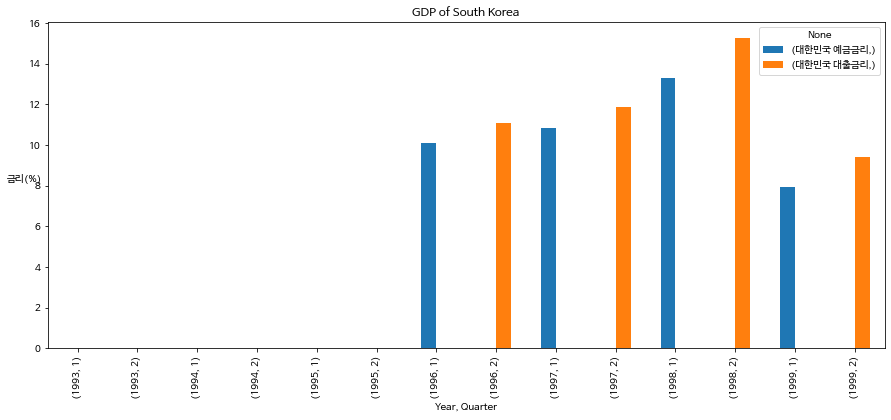

In [ ]:
# 시각화
korea_concat.plot.bar(figsize=(15, 6))

# 그래프 제목 설정
plt.title('GDP of South Korea')

# x축 라벨 설정
plt.xlabel('Year, Quarter')

# y축 라벨 설정
plt.ylabel('금리(%)',rotation=0)

# 그래프 출력
plt.show()

## 멕시코

In [ ]:
mexico = data.loc[['멕시코']]
mexico

,1993.1,1993.2,1993.3,1993.4,1994.1,1994.2,1994.3,1994.4,1995.1,1995.2,...,1997.3,1997.4,1998.1,1998.2,1998.3,1998.4,1999.1,1999.2,1999.3,1999.4
국가별,,,,,,,,,,,,,,,,,,,,,
멕시코,16.69,18.23,-,18.73,15.03,19.30,-,17.74,39.82,59.43,...,-,21.91,15.45,26.36,-,26.89,11.60,23.74,-,24.10


In [ ]:
mex_yr = data.loc[['멕시코'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1'] ]
mex_yr

,1993.1,1994.1,1995.1,1996.1,1997.1,1998.1,1999.1
국가별,,,,,,,
멕시코,16.69,15.03,39.82,26.40,16.36,15.45,11.60


In [ ]:
mex_dr = data.loc[['멕시코'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2'] ]
mex_dr

,1993.2,1994.2,1995.2,1996.2,1997.2,1998.2,1999.2
국가별,,,,,,,
멕시코,18.23,19.30,59.43,36.39,22.14,26.36,23.74


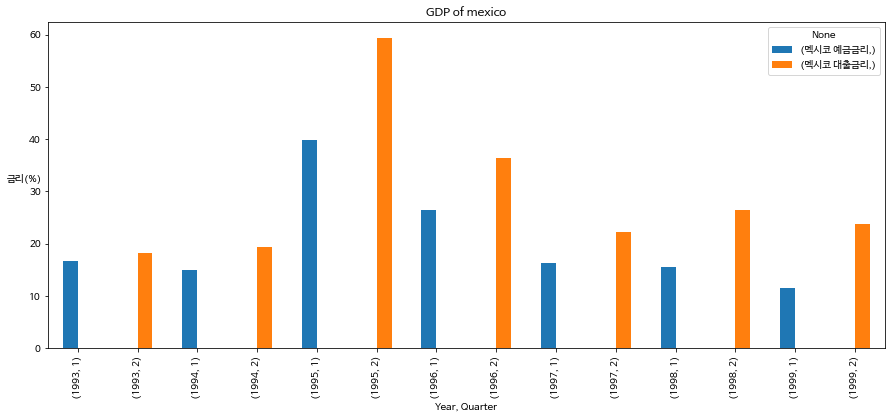

In [ ]:
mexico = data.loc[['멕시코']]
mex_yr = data.loc[['멕시코'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1']]
mex_yr = mex_yr.rename(index = {'멕시코':'멕시코 예금금리'})
mex_dr = data.loc[['멕시코'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2']]
mex_dr = mex_dr.rename(index = {'멕시코':'멕시코 대출금리'})

mexico_concat = pd.concat([mex_yr, mex_dr], axis=0)
mexico_concat = mexico_concat.sort_index(axis=1)

# 데이터 전처리: '-'와 'NaN'을 NaN 값으로 변환
mexico_concat = mexico_concat.replace('-', float('nan')).replace('NaN', float('nan')).astype(float)
# 국가별 컬럼을 인덱스로 설정

# # 행과 열을 바꿈
mexico_concat = mexico_concat.T

# 인덱스를 연도와 분기로 분리
mexico_concat.index = pd.MultiIndex.from_tuples([(int(year[:-2]), (year[-1])) for year in mexico_concat.index])

# 인덱스 이름 설정
mexico_concat.index.names = ['Year', 'Quarter']

# 컬럼 이름 설정
mexico_concat.columns.name = None

# 컬럼 인덱스를 멀티 인덱스로 변환
mexico_concat.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in mexico_concat.columns])

# 시각화
mexico_concat.plot.bar(figsize=(15, 6))

# 그래프 제목 설정
plt.title('GDP of mexico')

# x축 라벨 설정
plt.xlabel('Year, Quarter')

# y축 라벨 설정
plt.ylabel('금리(%)',rotation=0)

# 그래프 출력
plt.show()

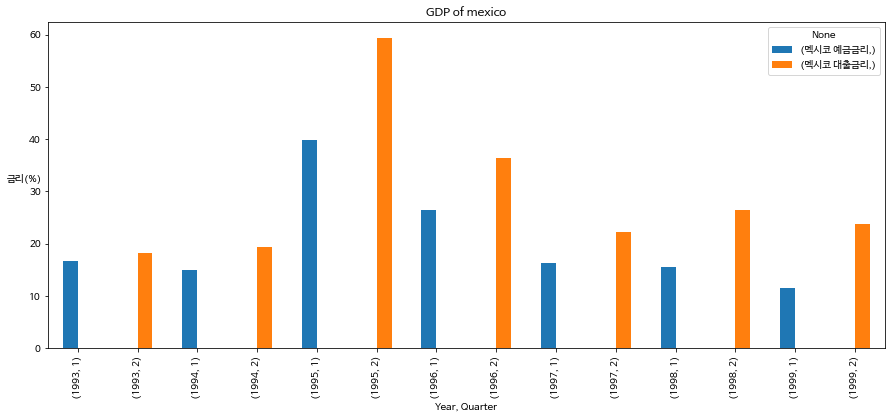

In [ ]:
mexico = data.loc[['멕시코']]
mex_yr = data.loc[['멕시코'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1']]
mex_yr = mex_yr.rename(index = {'멕시코':'멕시코 예금금리'})
mex_dr = data.loc[['멕시코'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2']]
mex_dr = mex_dr.rename(index = {'멕시코':'멕시코 대출금리'})

mexico_concat = pd.concat([mex_yr, mex_dr], axis=0)
mexico_concat = mexico_concat.sort_index(axis=1)

# 데이터 전처리: '-'와 'NaN'을 NaN 값으로 변환
mexico_concat = mexico_concat.replace('-', float('nan')).replace('NaN', float('nan')).astype(float)
# 국가별 컬럼을 인덱스로 설정

# # 행과 열을 바꿈
mexico_concat = mexico_concat.T

# 인덱스를 연도와 분기로 분리
mexico_concat.index = pd.MultiIndex.from_tuples([(int(year[:-2]), (year[-1])) for year in mexico_concat.index])

# 인덱스 이름 설정
mexico_concat.index.names = ['Year', 'Quarter']

# 컬럼 이름 설정
mexico_concat.columns.name = None

# 컬럼 인덱스를 멀티 인덱스로 변환
mexico_concat.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in mexico_concat.columns])

# 시각화
mexico_concat.plot.bar(figsize=(15, 6))

# 그래프 제목 설정
plt.title('GDP of mexico')

# x축 라벨 설정
plt.xlabel('Year, Quarter')

# y축 라벨 설정
plt.ylabel('금리(%)',rotation=0)

# 그래프 출력
plt.show()

## 태국

In [ ]:
thailand = data.loc[['태국']]
thailand

,1993.1,1993.2,1993.3,1993.4,1994.1,1994.2,1994.3,1994.4,1995.1,1995.2,...,1997.3,1997.4,1998.1,1998.2,1998.3,1998.4,1999.1,1999.2,1999.3,1999.4
국가별,,,,,,,,,,,,,,,,,,,,,
태국,8.63,11.17,-,6.54,8.46,10.90,-,7.25,11.58,13.25,...,-,15.69,10.65,14.42,-,13.02,4.77,8.98,7.94,1.77


In [ ]:
tland_yr = data.loc[['태국'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1'] ]
tland_yr

,1993.1,1994.1,1995.1,1996.1,1997.1,1998.1,1999.1
국가별,,,,,,,
태국,8.63,8.46,11.58,10.33,10.52,10.65,4.77


In [ ]:
tland_dr = data.loc[['태국'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2'] ]
tland_dr

,1993.2,1994.2,1995.2,1996.2,1997.2,1998.2,1999.2
국가별,,,,,,,
태국,11.17,10.90,13.25,13.40,13.65,14.42,8.98


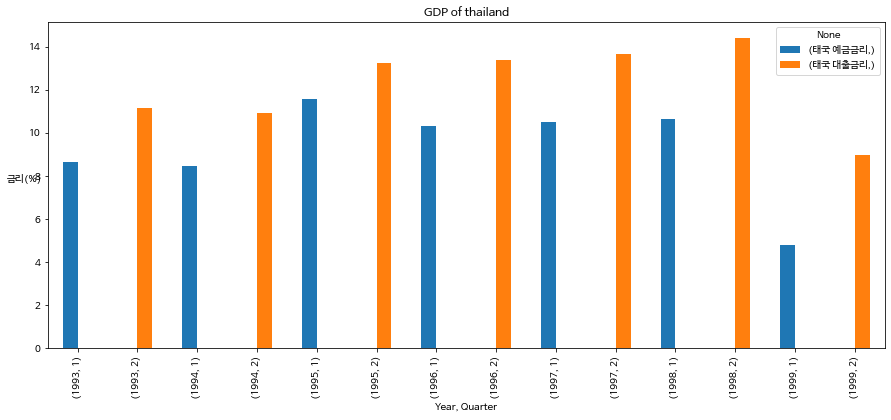

In [ ]:
thailand = data.loc[['태국']]
tland_yr = data.loc[['태국'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1']]
tland_yr = tland_yr.rename(index = {'태국':'태국 예금금리'})
tland_dr = data.loc[['태국'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2']]
tland_dr = tland_dr.rename(index = {'태국':'태국 대출금리'})

thailand_concat = pd.concat([tland_yr, tland_dr], axis=0)
thailand_concat = thailand_concat.sort_index(axis=1)

# 데이터 전처리: '-'와 'NaN'을 NaN 값으로 변환
thailand_concat = thailand_concat.replace('-', float('nan')).replace('NaN', float('nan')).astype(float)
# 국가별 컬럼을 인덱스로 설정

# # 행과 열을 바꿈
thailand_concat = thailand_concat.T

# 인덱스를 연도와 분기로 분리
thailand_concat.index = pd.MultiIndex.from_tuples([(int(year[:-2]), (year[-1])) for year in thailand_concat.index])

# 인덱스 이름 설정
thailand_concat.index.names = ['Year', 'Quarter']

# 컬럼 이름 설정
thailand_concat.columns.name = None

# 컬럼 인덱스를 멀티 인덱스로 변환
thailand_concat.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in thailand_concat.columns])

# 시각화
thailand_concat.plot.bar(figsize=(15, 6))

# 그래프 제목 설정
plt.title('GDP of thailand')

# x축 라벨 설정
plt.xlabel('Year, Quarter')

# y축 라벨 설정
plt.ylabel('금리(%)',rotation=0)

# 그래프 출력
plt.show()

## 미국

In [ ]:
usa = data.loc[['미국']]
usa

,1993.1,1993.2,1993.3,1993.4,1994.1,1994.2,1994.3,1994.4,1995.1,1995.2,...,1997.3,1997.4,1998.1,1998.2,1998.3,1998.4,1999.1,1999.2,1999.3,1999.4
국가별,,,,,,,,,,,,,,,,,,,,,
미국,-,6.00,5.87,3.02,-,7.14,7.08,4.20,-,8.83,...,6.35,5.46,-,8.35,5.26,5.35,-,7.99,5.64,4.97


In [ ]:
us_yr = data.loc[['미국'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1'] ]
us_yr # 존재 안함

,1993.1,1994.1,1995.1,1996.1,1997.1,1998.1,1999.1
국가별,,,,,,,
미국,-,-,-,-,-,-,-


In [ ]:
us_dr = data.loc[['미국'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2'] ]
us_dr

,1993.2,1994.2,1995.2,1996.2,1997.2,1998.2,1999.2
국가별,,,,,,,
미국,6.00,7.14,8.83,8.27,8.44,8.35,7.99


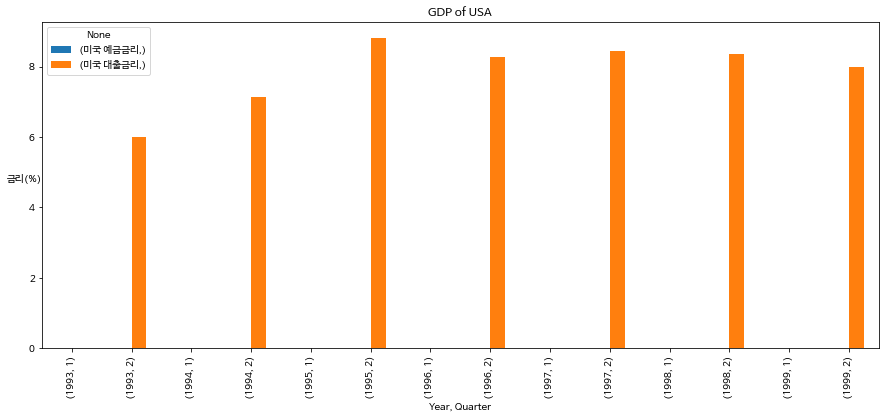

In [ ]:
usa = data.loc[['미국']]
us_yr = data.loc[['미국'],['1993.1','1994.1','1995.1','1996.1','1997.1','1998.1','1999.1']]
us_yr = us_yr.rename(index = {'미국':'미국 예금금리'})
us_dr = data.loc[['미국'],['1993.2','1994.2','1995.2','1996.2','1997.2','1998.2','1999.2']]
us_dr = us_dr.rename(index = {'미국':'미국 대출금리'})

usa_concat = pd.concat([us_yr, us_dr], axis=0)
usa_concat = usa_concat.sort_index(axis=1)

# 데이터 전처리: '-'와 'NaN'을 NaN 값으로 변환
usa_concat = usa_concat.replace('-', float('nan')).replace('NaN', float('nan')).astype(float)
# 국가별 컬럼을 인덱스로 설정

# # 행과 열을 바꿈
usa_concat = usa_concat.T

# 인덱스를 연도와 분기로 분리
usa_concat.index = pd.MultiIndex.from_tuples([(int(year[:-2]), (year[-1])) for year in usa_concat.index])

# 인덱스 이름 설정
usa_concat.index.names = ['Year', 'Quarter']

# 컬럼 이름 설정
usa_concat.columns.name = None

# 컬럼 인덱스를 멀티 인덱스로 변환
usa_concat.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in usa_concat.columns])

# 시각화
usa_concat.plot.bar(figsize=(15, 6))

# 그래프 제목 설정
plt.title('GDP of USA')

# x축 라벨 설정
plt.xlabel('Year, Quarter')

# y축 라벨 설정
plt.ylabel('금리(%)',rotation=0)

# 그래프 출력
plt.show()

<hr>

# 대한민국의 환율, 외환보유 데이터 및 그래프 

# 환율 외환보유액

In [ ]:
kmt_df = df2.loc[['대한민국', '멕시코', '태국', '미국']]
kmt_df.drop('1993.1', axis='columns', inplace=True)
kmt_df.drop('1994.1', axis='columns', inplace=True)
kmt_df.drop('1995.1', axis='columns', inplace=True)
kmt_df.drop('1997.1', axis='columns', inplace=True)
kmt_df.drop('1998.1', axis='columns', inplace=True)
kmt_df.drop('1999.1', axis='columns', inplace=True)
kmt_df.drop('1996.1', axis='columns', inplace=True)
kmt_df1 = df1.loc[['대한민국(Won)', '멕시코(Pesos)', '태국(Baht)', '미국(US$)']]



data = {'국가별': ['대한민국', '멕시코', '태국', '미국'],
        '1993': [20262, 25299, 25440, 73406],
        '1994': [25673, 6441, 30279, 74335],
        '1995': [32712, 17045, 36945, 85831],
        '1996': [33237, 19527, 38645, 75089],
        '1997': [20405, 28853, 26892, 69954],
        '1998': [52041, 31863, 29536, 81760],
        '1999': [74055, 31829, 34781, 71548]}

kmt_df = pd.DataFrame(data)
kmt_df = kmt_df.set_index('국가별')

data1 = {'국가(통화단위)별': ['대한민국(Won)', '멕시코(Pesos)', '태국(Baht)'],
        '1993': [802.75, 3.12, 25.32],
        '1994': [803.46, 3.38, 25.15],
        '1995': [770.94, 6.42, 24.92],
        '1996': [805.13, 7.60, 25.34],
        '1997': [953.58, 7.92, 31.36],
        '1998': [1394.97, 9.14, 41.36],
        '1999': [1188.65, 9.56, 37.81]
        }

kmt_df1 = pd.DataFrame(data1)
kmt_df1 = kmt_df1.set_index('국가(통화단위)별')

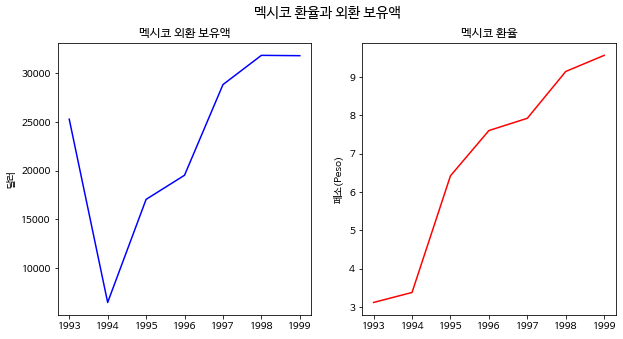

In [ ]:
mexico = kmt_df.loc['멕시코']
mexico2 = kmt_df1.loc['멕시코(Pesos)']
# 국가별 데이터 선택
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# 첫 번째 subplot에 그래프 그리기
mexico.plot(ax=axs[0], kind='line', color='blue')
mexico2.plot(ax=axs[1], kind='line', color='red')
# 그래프 제목 설정


axs[0].set_title('멕시코 외환 보유액')
axs[0].set_ylabel('달러')
axs[1].set_title('멕시코 환율')
axs[1].set_ylabel('페소(Peso)')

fig.suptitle('멕시코 환율과 외환 보유액', fontsize=14)

plt.show()
plt.show()
plt.show()

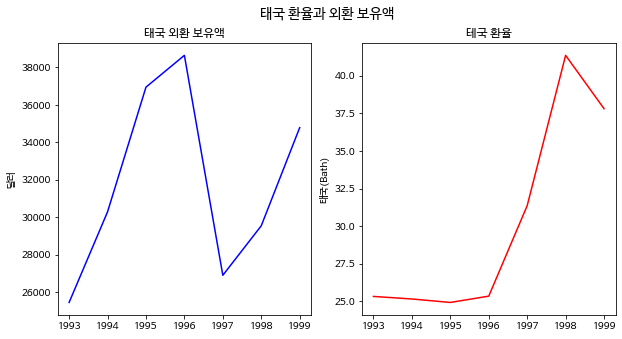

In [ ]:
Thailand = kmt_df.loc['태국']
Thailand2 = kmt_df1.loc['태국(Baht)']
# subplots로 두 개의 그래프 영역을 만듦
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# 첫 번째 subplot에 그래프 그리기
Thailand.plot(ax=axs[0], kind='line', color='blue')
Thailand2.plot(ax=axs[1], kind='line', color='red')
# 그래프 제목 설정


axs[0].set_title('태국 외환 보유액')
axs[0].set_ylabel('달러')
axs[1].set_title('테국 환율')
axs[1].set_ylabel('태국(Bath)')

fig.suptitle('태국 환율과 외환 보유액', fontsize=14)

plt.show()
plt.show()

# 한국 외환, 환율, 금리

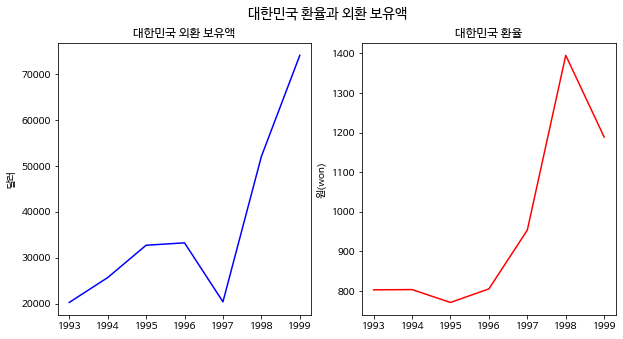

In [ ]:
 # 국가별 데이터 선택
korea1 = kmt_df.loc['대한민국']
korea2 = kmt_df1.loc['대한민국(Won)']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

korea1.plot(ax=axs[0], kind='line', color='blue')
korea2.plot(ax=axs[1], kind='line', color='red')

# 그래프 제목 설정
axs[0].set_title('대한민국 외환 보유액')
axs[0].set_ylabel('달러')
axs[1].set_title('대한민국 환율')
axs[1].set_ylabel('원(won)')

fig.suptitle('대한민국 환율과 외환 보유액', fontsize=14)

plt.show()

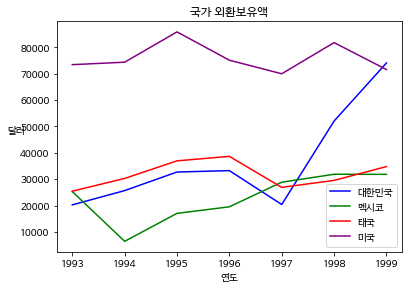

In [ ]:
USA = kmt_df.loc['미국']

# 막대 그래프로 표현
plt.plot(korea1.index, korea1.values, label='대한민국', color='blue')
plt.plot(mexico.index, mexico.values, label='멕시코', color='green')
plt.plot(Thailand.index, Thailand.values, label='태국', color='red')
plt.plot(USA.index, USA.values, label='미국', color='purple')
# 그래프 제목과 축 이름 설정
plt.title('국가 외환보유액')
plt.xlabel('연도')
plt.ylabel('달러', rotation=0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.legend()
# 그래프 출력
plt.show()

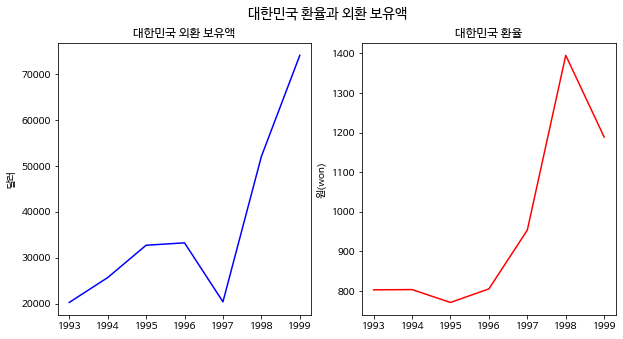

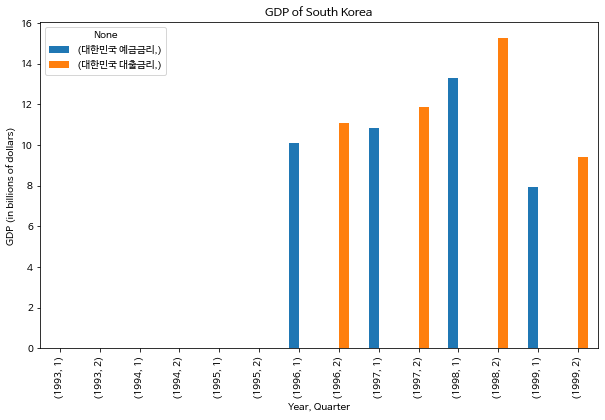

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
korea_concat.plot.bar(figsize=(10, 6))
korea1.plot(ax=axs[0], kind='line', color='blue')
korea2.plot(ax=axs[1], kind='line', color='red')
# 그래프 제목 설정
plt.title('GDP of South Korea')
plt.xlabel('Year, Quarter')
plt.ylabel('GDP (in billions of dollars)')

axs[0].set_title('대한민국 외환 보유액')
axs[0].set_ylabel('달러')
axs[1].set_title('대한민국 환율')
axs[1].set_ylabel('원(won)')

fig.suptitle('대한민국 환율과 외환 보유액', fontsize=14)

plt.show()